# Loading Data

In [2]:
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt

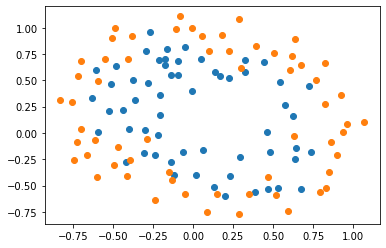

In [3]:
data = np.loadtxt("ex2data2.txt", dtype=np.float64, delimiter=',')
x = data[:,:2]
y = data[:,2:]
plt.scatter(x[np.squeeze(y==True)][:,0],x[np.squeeze(y==True)][:,1])
plt.scatter(x[np.squeeze(y==False)][:,0],x[np.squeeze(y==False)][:,1])
plt.show()

# Guess Function
$$
h_\theta(x) = sigmoid(\theta_0 + \theta_1 \cdot x_0 + \theta_2 \cdot x_1 + \theta_3 \cdot x_0^2 +\theta_4 \cdot x_1^2)
$$ 

# Define Parameters

In [ ]:
theta = np.random.randn(5, 1)

# Define Hyper-Parameters

In [ ]:
epoch = 2000000
lr = 0.001
log = []

# Preparing Data
Adding $x^2$ and column 1 & Normalisation

In [ ]:
x = np.concatenate((x, x**2), axis=1)
print(x.shape)
x = (x - x.mean(0)) / x.std(0)
x = np.concatenate((np.ones(shape=(len(x), 1)), x), axis=1)

# Define Sigmoid

In [ ]:
def sigmoid(x:np.ndarray):
    return 1 / (1 + np.exp(-x))

# Define Loss and its Derivative

In [ ]:
def loss(y0:np.ndarray, y:np.ndarray):
    """
    y0 is predicted sigmoid function
    y is real labelling
    """
    return (-y * np.log(y0) - (1 - y) * np.log(1 - y0)).mean()

In [ ]:
def derivative(x:np.ndarray, theta:np.ndarray, y:np.ndarray):
    y0 = sigmoid(np.dot(x, theta))
    lost = loss(y0, y)
    d_ = np.dot(x.T, (y0 - y)) / len(y)
    return d_, lost

# Trainning

In [ ]:
for i in tqdm(range(epoch)):
    step, lost = derivative(x, theta, y)
    log.append(lost)
    theta -= step * lr
plt.plot(list(range(len(log))), log)

# Testing

In [ ]:
print((sigmoid(np.dot(x, theta)) > 0.5) ==  y).sum() / len(y)

In [ ]:
plt.scatter(x[np.squeeze((sigmoid(np.dot(x, theta)) > 0.5) ==  y)][:,1],
x[np.squeeze((sigmoid(np.dot(x, theta)) > 0.5) ==  y)][:,2])
plt.scatter(x[np.squeeze((sigmoid(np.dot(x, theta)) > 0.5) !=  y)][:,1],
x[np.squeeze((sigmoid(np.dot(x, theta)) > 0.5) !=  y)][:,2])
